In [1]:
import konlpy
import gensim
import sklearn
import seaborn

In [2]:
import os

with open(os.getenv("HOME")+"/aiffel/weat/synopsis.txt", 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [3]:
#형태소 분석기를 이용. 명사 단어 추출

from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+"/aiffel/weat/synopsis.txt", 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:
                res.append(w[0])
        tokenized.append(res)

In [4]:
print(len(tokenized))

71156


In [5]:
print(tokenized[0])

['사운드', '엔지니어', '상우', '유지태', '분', '치매', '할머니', '백성희', '분']


In [6]:
# 추출된 결과로 embedding model 만들기

from gensim.models import Word2Vec

model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
model.wv.most_similar(positive=['영화'])

[('작품', 0.890437126159668),
 ('다큐멘터리', 0.845380961894989),
 ('드라마', 0.8237860798835754),
 ('영화로', 0.815334677696228),
 ('형식', 0.7895810604095459),
 ('주제', 0.7888548374176025),
 ('코미디', 0.7849490642547607),
 ('소재', 0.7718026041984558),
 ('인터뷰', 0.7670367360115051),
 ('영상', 0.7594538331031799)]

In [7]:
model.wv.most_similar(positive=["학살"])

[('참사', 0.93365478515625),
 ('내전', 0.9170108437538147),
 ('자행', 0.9105768203735352),
 ('분쟁', 0.9094862341880798),
 ('붕괴', 0.907870352268219),
 ('민간인', 0.9036487340927124),
 ('이스라엘', 0.9022499322891235),
 ('세월호', 0.8999674320220947),
 ('체첸', 0.8982575535774231),
 ('계엄령', 0.8947084546089172)]

In [10]:
model.wv.most_similar(positive=["힘"])

[('생명', 0.8534320592880249),
 ('구원', 0.8529910445213318),
 ('물리', 0.8305522799491882),
 ('악마', 0.8269953727722168),
 ('신의', 0.8260921239852905),
 ('인류', 0.8080534934997559),
 ('절대', 0.7979838848114014),
 ('외계생명체', 0.7978266477584839),
 ('악', 0.797724187374115),
 ('동물', 0.7920219898223877)]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME') + "/aiffel/weat/"+file_name, 'r') as fread:
        print(file_name, "파일을 읽고 있습니다.")
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:
                    result.append((word[0]))
        return ' '.join(result)

In [14]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [17]:
print(vectorizer.vocabulary_["영화"])
print(vectorizer.get_feature_names()[23976])

23976
영화


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
m1 = X[0].tocoo()
m2 = X[1].tocoo()

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)
w2.sort(key=lambda x: x[1], reverse=True)

print("예술영화를 대표하는 단어들:")
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')
    
print('\n')

print("일반영화를 대표하는 단어들:")
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [20]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])
    
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv):
        target_art.append(w1_[i])
    if len(target_art) == n: break
        
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv):
        target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [21]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [22]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [40]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [41]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [42]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [56]:
w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 애거, 바오, 시민군, 빈틈, 관해, 윤설희, 아리, 살살, 년도, 산악, 삼헌, 버스정류장, 뱅크스, 보랏, 별거, 
가족: 바오, 애거, 빈틈, 윤설희, 시민군, 병욱, 검은색, 뱅크스, 산림, 고해, 무시, 살살, 박기웅, 낙관, 산악, 
공연: 시민군, 애거, 빈틈, 윤설희, 레슬링, 박기웅, 살살, 발단, 오마쥬, 산악, 알갱이, 스에코, 미켈, 낙관, 바오, 
공포(호러): 애거, 빈틈, 시민군, 바오, 윤설희, 아리, 아쿠아리움, 삼헌, 살살, 레슬링, 검은색, 뱅크스, 박기웅, 년도, 관해, 
기타: 시민군, 빈틈, 액션, 무법천지, 시빌라, 애거, 고등, 알갱이, 손녀, 리메이크, 리롱, 광장공포증, 벽난로, 오즈, 널리, 
다큐멘터리: 빈틈, 시민군, 애거, 윤설희, 고양, 오마쥬, 조선시대, 박기웅, 보랏, 발단, 삼헌, 영업일, 미켈, 아리, 레더, 


In [57]:
attributes[0]

['애거',
 '바오',
 '시민군',
 '빈틈',
 '관해',
 '윤설희',
 '아리',
 '살살',
 '년도',
 '산악',
 '삼헌',
 '버스정류장',
 '뱅크스',
 '보랏',
 '별거']

In [58]:
attributes[0][0]

'애거'

# WEAT_score

In [59]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [60]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

def weat_score(X, Y, A, B):
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)
    
    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    return (mean_X-mean_Y)/std_dev

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

IndexError: list index out of range

In [49]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j], matrix[i][j])

SF 가족 -0.012605722
SF 공연 0.9308848
SF 공포(호러) 0.43929425
SF 기타 -0.012288626
SF 다큐멘터리 0.42405394
SF 드라마 0
SF 멜로로맨스 0
SF 뮤지컬 0
SF 미스터리 0
SF 범죄 0
SF 사극 0
SF 서부극(웨스턴) 0
SF 성인물(에로) 0
SF 스릴러 0
SF 애니메이션 0
SF 액션 0
SF 어드벤처 0
SF 전쟁 0
SF 코미디 0
SF 판타지 0
가족 공연 0
가족 공포(호러) 0
가족 기타 0
가족 다큐멘터리 0
가족 드라마 0
가족 멜로로맨스 0
가족 뮤지컬 0
가족 미스터리 0
가족 범죄 0
가족 사극 0
가족 서부극(웨스턴) 0
가족 성인물(에로) 0
가족 스릴러 0
가족 애니메이션 0
가족 액션 0
가족 어드벤처 0
가족 전쟁 0
가족 코미디 0
가족 판타지 0
공연 공포(호러) 0
공연 기타 0
공연 다큐멘터리 0
공연 드라마 0
공연 멜로로맨스 0
공연 뮤지컬 0
공연 미스터리 0
공연 범죄 0
공연 사극 0
공연 서부극(웨스턴) 0
공연 성인물(에로) 0
공연 스릴러 0
공연 애니메이션 0
공연 액션 0
공연 어드벤처 0
공연 전쟁 0
공연 코미디 0
공연 판타지 0
공포(호러) 기타 0
공포(호러) 다큐멘터리 0
공포(호러) 드라마 0
공포(호러) 멜로로맨스 0
공포(호러) 뮤지컬 0
공포(호러) 미스터리 0
공포(호러) 범죄 0
공포(호러) 사극 0
공포(호러) 서부극(웨스턴) 0
공포(호러) 성인물(에로) 0
공포(호러) 스릴러 0
공포(호러) 애니메이션 0
공포(호러) 액션 0
공포(호러) 어드벤처 0
공포(호러) 전쟁 0
공포(호러) 코미디 0
공포(호러) 판타지 0
기타 다큐멘터리 0
기타 드라마 0
기타 멜로로맨스 0
기타 뮤지컬 0
기타 미스터리 0
기타 범죄 0
기타 사극 0
기타 서부극(웨스턴) 0
기타 성인물(에로) 0
기타 스릴러 0
기타 애니메이션 0
기타 액션 0
기타 어드벤처 0
기타 전쟁 0
기타 코미디 0
기타 판타지 0
다큐멘터리 드

<AxesSubplot:>

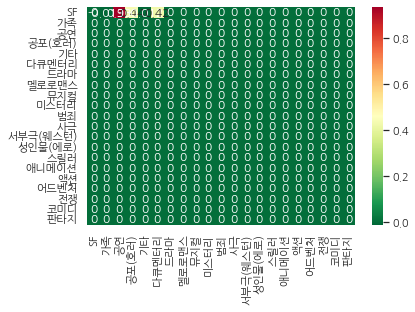

In [50]:
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(0)

sns.set(font='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax